# Web Scraping of Data Analyst Jobs Analysis 

This project is a showcase for Scrape and Analyze data analyst job requirements with Python Coursera Project which is part of the Google Data Analytics Professional Certificate course I completed.
- https://www.coursera.org/professional-certificates/google-data-analytics
- https://www.coursera.org/learn/scrape-job-postings-data-analyst/supplement/uKwPr/the-project-scenario

## Overview

I am acting as a data analyst at a medium-sized recruitment agency to help improve its sourcing of job vacancies

## 1. Business Problem

The agency relies on multiple job posting sites to identify potential job openings for its clients. It searches through each site manually which is time-consuming and often leads to missed opportunities.  

They want me to  analyse **Data Analyst** role advert data using web scraping tools that can ** automatically** extract job posting data from a job posting site.  The team will use my analysis to provide a more efficient way to provide job vacancies to better serve its clients. This feature will help the recruitment agency by getting relevant openings to their clients more quickly, giving their clients a competitive advantage over other applicants.

## Project Objectives

- To  create a web scraping tool that can automatically extract data of  Data Analyst jobs from a job posting site
- To increase the efficiency &  quality of job vacancy sourcing 
- To gain a competitive advantage
- To give suggestions on my findings 
  
### My Challenges

My task will be to conduct a web scraping data analysis to automatically extract job posting data from a job posting site. 
To do this I will: 

* Identify the job posting site
* Set up the environment
* Scrape and save,  process, analyse, and visualise the data.
* Share my findings
 
 
**Here are the steps I am going to follow:**

1. Browse through different job websites for Data Analyst role in England and pick one to scrape 
2. From the first page of the site extract the job details for each job to experiment the code before applying to all pages
3. Create one line code of function that **automatically** extracts jobs from all pages of the website, 
4. Then download the scraped data, convert it to Dataframe and save it as a CSV file format.
5. process, analyse and visualise the data.

* The **tools** that I am going to use are- **Python, Requests, BeautifulSoup and Pandas**


## Introduction 

Web scraping is the automatic extracting of information from a website within a very short time. 


## Selecting a job posting site

* Most job websites I tried have an anti-scraping filter which can affect my results.

* I have chosen **www.reed.co.uk** for this project because it is easier to scrape and specialised in advertising local jobs in the UK 


## 2. Data Collection

In [1]:
#importing libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup

def get_soup():
    
    url = "https://www.reed.co.uk/jobs/data-analyst-jobs-in-england"

    api ={
        "User-agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36"}

    # send request to the website 
    response = requests.get(url, headers=api)
    data = response.text
    
    # Convert the data to a beautiful soup page
    soup = BeautifulSoup(data, 'html')

    print(response.status_code)
    
    return soup

soup = get_soup()


200


In [4]:
# check the soup type
type(soup)

bs4.BeautifulSoup

In [5]:
# extract h3 tag 
soup.find('h3')


<h3>Data Analyst<!-- --> courses</h3>

### Getting information of the jobs postings from the first page

- The salary, working hours, location,  job title and URL link are in 'div' tag
- We can access it by right cliking on one of the jobs title then from drop down menu select 'Inspect' to explorer the required sections


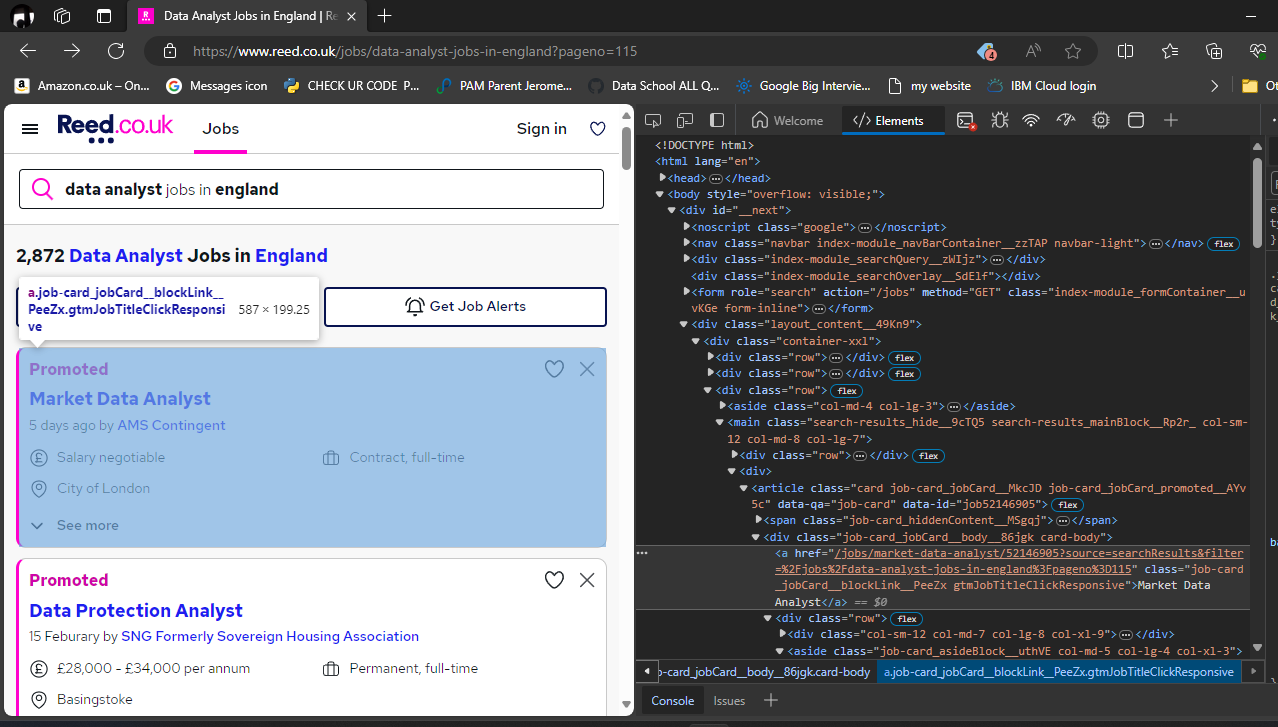

### All the information I am looking for is under div tag ['div', class_= 'col-sm-12 col-md-7 col-lg-8 col-xl-9')]

In [ ]:
# accessing the  'div' tag
divs = soup.find_all('div', class_= 'col-sm-12 col-md-7 col-lg-8 col-xl-9')
len(divs)


In [4]:
divs = soup.find_all('div', class_= 'col-sm-12 col-md-7 col-lg-8 col-xl-9')

div_0 = divs[0]
print(div_0.prettify())

<div class="col-sm-12 col-md-7 col-lg-8 col-xl-9">
 <header>
  <div class="job-card_jobResultHeading__badges__t9Upf">
   <label class="badge index-module_label__TLPcM index-module_label__promoted__xiAWL">
    Promoted
   </label>
   <label class="badge index-module_label__TLPcM index-module_label__easyapply__kAARG">
    <svg height="12" viewbox="0 0 13 12" width="13" xmlns="http://www.w3.org/2000/svg">
     <path d="M7.111 0L1 7.2h5.5L5.889 12 12 4.8H6.5z" fill="#FF00CD" fill-rule="evenodd" stroke="#FF00CD" stroke-linecap="round" stroke-linejoin="round">
     </path>
    </svg>
    Easy Apply
   </label>
  </div>
  <h2 class="job-card_jobResultHeading__title__IQ8iT">
   <a class="gtmJobTitleClickResponsive" data-element="job_title" data-gtm="sponsored_job_click" data-gtm-value="52392910" data-id="52392910" data-page-component="job_card" data-qa="job-card-title" href="/jobs/data-analyst/52392910?source=searchResults&amp;filter=%2Fjobs%2Fdata-analyst-jobs-in-england" title="Data Analyst"

### Job title

In [7]:
# The job title is in <h2> tag <h2 class="job-card_jobResultHeading__title__IQ8iT">
# title = div_0.find('h2', class_="job-card_jobResultHeading__title__IQ8iT").text
titel = div_0.h2.text
titel


'Data Analyst'

### Location

In [9]:
# Location has it own list <'li' data-qa="job-card-location"
loc_div_0 = div_0.find('li',{'data-qa' :'job-card-location'}).text
# print(loc_div_0.prettify())
loc_div_0


'Redhill'

### Salary & working hours 

In [10]:
# Salary & working hours don't have theirs own tag both are in <li, class ="job-card_jobMetadata__item___QNud list-group-item" 
salary_loc_hrs = div_0.find_all('li', class_="job-card_jobMetadata__item___QNud list-group-item")
for i in salary_loc_hrs:
#     print(i.prettify())
    print(i.text)

£28,000 - £32,000 per annum
Redhill
Permanent, full-time


### Salary

In [11]:
# The salary is FIRST in the lis at index 0
salary = div_0.find_all('li', class_="job-card_jobMetadata__item___QNud list-group-item")[0].text
salary 


'£28,000 - £32,000 per annum'

### Working hours

In [12]:
# The working hoours is THIRD  in the lis at index 2
working_hrs = div_0.find_all('li', class_="job-card_jobMetadata__item___QNud list-group-item")[2].text
working_hrs


'Permanent, full-time'

### Job description 

In [13]:
# We can also use [class_="job-card_jobResultDescription__details___xS_G"]
description = div_0.find('p', {'data-qa':"jobDescriptionDetails"}).text
description


'If you are a Data Analyst with a commitment to delivering high quality services to our customers, we’d love you to join SES Water on our journey to ma...'

### Employer and weblink are in <a tag

In [14]:
a = div_0.find_all('a')
for i in a: 
    print(i.prettify())
#     print(i.text)

<a class="gtmJobTitleClickResponsive" data-element="job_title" data-gtm="sponsored_job_click" data-gtm-value="52392910" data-id="52392910" data-page-component="job_card" data-qa="job-card-title" href="/jobs/data-analyst/52392910?source=searchResults&amp;filter=%2Fjobs%2Fdata-analyst-jobs-in-england" title="Data Analyst">
 Data Analyst
</a>

<a class="gtmJobListingPostedBy" data-element="recruiter" data-page-component="job_card" href="/jobs/ses-water-91334/p91334">
 SES Water
</a>

<a class="" data-gtm="internal_job_link" data-gtm-value="Analyst jobs in england" href="/jobs/analyst-jobs-in-england" title="Analyst jobs in england">
 Analyst jobs in england
</a>



### Employer

In [15]:
# The emaployer name (SES water) is in <a> tag <a class="gtmJobListingPostedBy" OR  <a  data-element="recruiter"  
# emp1 = div_0.find('a', class_="gtmJobListingPostedBy").text

employer = div_0.find('a', {'data-element':"recruiter"}).text
employer


'SES Water'

### Job advert web link

In [16]:
href = div_0.h2.a
print(href.prettify())

<a class="gtmJobTitleClickResponsive" data-element="job_title" data-gtm="sponsored_job_click" data-gtm-value="52392910" data-id="52392910" data-page-component="job_card" data-qa="job-card-title" href="/jobs/data-analyst/52392910?source=searchResults&amp;filter=%2Fjobs%2Fdata-analyst-jobs-in-england" title="Data Analyst">
 Data Analyst
</a>



In [17]:
weblink  = div_0.h2.a.get('href')
weblink


'/jobs/data-analyst/52392910?source=searchResults&filter=%2Fjobs%2Fdata-analyst-jobs-in-england'

In [18]:
div_new[15].h2.a.get('href')


'/jobs/data-analyst-trainee/52476211?source=searchResults&filter=%2Fjobs%2Fdata-analyst-jobs-in-england'

### The date Job advertised 

In [19]:
date  = div_0.find('div', class_="job-card_jobResultHeading__postedBy__sK_25")
date.text
print(date.prettify())


<div class="job-card_jobResultHeading__postedBy__sK_25">
 28 March
 <!-- -->
 by
 <!-- -->
 <a class="gtmJobListingPostedBy" data-element="recruiter" data-page-component="job_card" href="/jobs/ses-water-91334/p91334">
  SES Water
 </a>
</div>



In [20]:
date.text

'28 March by SES Water'

In [21]:
date.text.partition('by')[0].strip()

'28 March'

In [22]:
date  = div_0.find('div', class_="job-card_jobResultHeading__postedBy__sK_25").text.partition('by')[0].strip()
date


'28 March'

## Functions into action  

In [8]:
#importing libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup

def get_soup():
    
    url = "https://www.reed.co.uk/jobs/data-analyst-jobs-in-england"

    api ={
        "User-agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36"}

    response = requests.get(url, headers=api)
    data = response.text
    soup = BeautifulSoup(data, 'html')

    print(response.status_code)
    
    return soup

soup = get_soup()


200


## Create a function to apply the above to div_0

In [3]:

divs = soup.find_all('div', class_= 'col-sm-12 col-md-7 col-lg-8 col-xl-9')

div_0 = divs[0]

dic = {'titel' :[], 'salary' :[], 'location':[], 'job_weblink' :[], 'working_hours' :[], 'job_description': [], 
       'employer':[],'date':[]}

def div_zero(item):
        
    titel = item.h2.text

    date  = item.find('div', class_="job-card_jobResultHeading__postedBy__sK_25").text.partition('by')[0].strip()

    employer = item.find('a', {'data-element':"recruiter"}).text

    location = item.find('li',{'data-qa' :'job-card-location'}).text

    salary = item.find_all('li', class_="job-card_jobMetadata__item___QNud list-group-item")[0].text

    working_hrs = item.find_all('li', class_="job-card_jobMetadata__item___QNud list-group-item")[2].text
    
    weblink  = div_0.h2.a.get('href')

    description = item.find('p', {'data-qa':"jobDescriptionDetails"}).text

    # Append the above values to the relevant dictionary keys of the dictionary (dic)
    dic['titel'].append(titel), dic['date'].append(date), dic['employer'].append(employer), 

    dic['location'].append(location),dic['salary'].append(salary), dic['working_hours'].append(working_hrs),

    dic['job_weblink'].append(weblink), dic['job_description'].append(description)
    
    
    # Create a dataframe 
    df = pd.DataFrame(dic)

    return df
        
        
# Run the function       
div_zero(div_0)     
        

,titel,salary,location,job_weblink,working_hours,job_description,employer,date
0,Data Analyst,"£28,000 - £32,000 per annum",Redhill,/jobs/data-analyst/52392910?source=searchResul...,"Permanent, full-time",If you are a Data Analyst with a commitment to...,SES Water,28 March


## Apply the function to all entries of the first page of the website & create a Dataframe

In [20]:
divs = soup.find_all('div', class_= 'col-sm-12 col-md-7 col-lg-8 col-xl-9')

dic = {'titel' :[], 'salary' :[], 'location':[], 'job_weblink' :[], 'working_hours' :[], 'job_description': [], 
       'employer':[],'date':[]}

def divs_all():
    
    
    for item in divs:
        
        
        titel = item.h2.text

        date  = item.find('div', class_="job-card_jobResultHeading__postedBy__sK_25").text.partition('by')[0].strip()

        employer = item.find('a', {'data-element':"recruiter"}).text

        location = item.find('li',{'data-qa' :'job-card-location'}).text

        salary = item.find_all('li', class_="job-card_jobMetadata__item___QNud list-group-item")[0].text

        working_hrs = item.find_all('li', class_="job-card_jobMetadata__item___QNud list-group-item")[2].text

#         weblink  = item.find('a', class_="gtmJobTitleClickResponsive").get('href')
        weblink  = div_0.h2.a.get('href')

        description = item.find('p', {'data-qa':"jobDescriptionDetails"}).text


        dic['titel'].append(titel), dic['date'].append(date), dic['employer'].append(employer), 

        dic['location'].append(location),dic['salary'].append(salary), dic['working_hours'].append(working_hrs),

        dic['job_weblink'].append(weblink), dic['job_description'].append(description)

        df = pd.DataFrame(dic)

    return df
        
        
        
divs_all()     
        
    

,titel,salary,location,job_weblink,working_hours,job_description,employer,date
0,Data Analyst,"£28,000 - £32,000 per annum",Redhill,/jobs/data-analyst/52392910?source=searchResul...,"Permanent, full-time",If you are a Data Analyst with a commitment to...,SES Water,28 March
1,Business Data Analyst/Data Analyst,Competitive salary,Birmingham,/jobs/data-analyst/52392910?source=searchResul...,"Contract, full-time",AMS is the world's leading provider of Talent ...,Deutsche Bank,3 days ago
2,Data Analyst,Competitive salary,Worthing,/jobs/data-analyst/52392910?source=searchResul...,"Permanent, full-time",Equiniti is a leading international provider o...,Equiniti,18 April
3,Data Analyst,"£32,000 per annum",Peterborough,/jobs/data-analyst/52392910?source=searchResul...,"Permanent, full-time",Data Analyst - Optimisation/ Water Recycling 3...,Anglian Water,9 April
4,Data Analyst,"£28,000 - £32,000 per annum",Redhill,/jobs/data-analyst/52392910?source=searchResul...,"Permanent, full-time",If you are a Data Analyst with a commitment to...,SES Water,28 March
5,Business Data Analyst/Data Analyst,Competitive salary,Birmingham,/jobs/data-analyst/52392910?source=searchResul...,"Contract, full-time",AMS is the world's leading provider of Talent ...,Deutsche Bank,3 days ago
6,Data Analyst Trainee,Training Course,Middlesbrough,/jobs/data-analyst/52392910?source=searchResul...,"Permanent, full-time",Are you looking to benefit from a new career i...,ITonlinelearning Recruitment,15 April
7,Data Analyst Trainee,Training Course,Basildon,/jobs/data-analyst/52392910?source=searchResul...,"Permanent, full-time",Are you looking to benefit from a new career i...,ITonlinelearning Recruitment,15 April
8,Data Analyst Trainee,Training Course,Burnley,/jobs/data-analyst/52392910?source=searchResul...,"Permanent, full-time",Are you looking to benefit from a new career i...,ITonlinelearning Recruitment,15 April
9,Data Analyst Trainee,Training Course,Cambridge,/jobs/data-analyst/52392910?source=searchResul...,"Permanent, full-time",Are you looking to benefit from a new career i...,ITonlinelearning Recruitment,29 January


## Create a dictionary and apply to ONE entry  of divs on first page of the website

In [5]:

divs = soup.find_all('div', class_= 'col-sm-12 col-md-7 col-lg-8 col-xl-9')

div_0 = divs[0]

dic = {'titel' :[], 'salary' :[], 'location':[], 'job_weblink' :[], 'working_hours' :[], 'job_description': [], 
       'employer':[],'date':[]}

def divs_1(div):
        
    titel = div.h2.text

    date  = div.find('div', class_="job-card_jobResultHeading__postedBy__sK_25").text.partition('by')[0].strip()

    employer = div.find('a', {'data-element':"recruiter"}).text

    location = div.find('li',{'data-qa' :'job-card-location'}).text

    salary = div.find_all('li', class_="job-card_jobMetadata__item___QNud list-group-item")[0].text

    working_hrs = div.find_all('li', class_="job-card_jobMetadata__item___QNud list-group-item")[2].text
    
    weblink  = div.h2.a.get('href')

    description = div.find('p', {'data-qa':"jobDescriptionDetails"}).text

    # Append the above values to the relevant dictionary keys of the dictionary (dic)
    dic['titel'].append(titel), dic['date'].append(date), dic['employer'].append(employer), 

    dic['location'].append(location),dic['salary'].append(salary), dic['working_hours'].append(working_hrs),

    dic['job_weblink'].append(weblink), dic['job_description'].append(description)


    # Create the dictionary (dic) 
    return dic
        
        
# Run the function for div_0      
divs_1(div_0)     
        

{'titel': ['Data Analyst'],
 'salary': ['£28,000 - £32,000 per annum'],
 'location': ['Redhill'],
 'job_weblink': ['/jobs/data-analyst/52392910?source=searchResults&filter=%2Fjobs%2Fdata-analyst-jobs-in-england'],
 'working_hours': ['Permanent, full-time'],
 'job_description': ['If you are a Data Analyst with a commitment to delivering high quality services to our customers, we’d love you to join SES Water on our journey to ma...'],
 'employer': ['SES Water'],
 'date': ['28 March']}

In [14]:
#check the function for other div (divs[1])
div_1 = divs[1]
divs_1(div_1)

{'titel': ['Data Analyst', 'Business Data Analyst/Data Analyst'],
 'salary': ['£28,000 - £32,000 per annum', 'Competitive salary'],
 'location': ['Redhill', 'Birmingham'],
 'job_weblink': ['/jobs/data-analyst/52392910?source=searchResults&filter=%2Fjobs%2Fdata-analyst-jobs-in-england',
  '/jobs/business-data-analyst-data-analyst/52528944?source=searchResults&filter=%2Fjobs%2Fdata-analyst-jobs-in-england'],
 'working_hours': ['Permanent, full-time', 'Contract, full-time'],
 'job_description': ['If you are a Data Analyst with a commitment to delivering high quality services to our customers, we’d love you to join SES Water on our journey to ma...',
  "AMS is the world's leading provider of Talent Acquisition and Management Services. Our Contingent Workforce Solutions (CWS) service, partner with Deut..."],
 'employer': ['SES Water', 'Deutsche Bank'],
 'date': ['28 March', '3 days ago']}

## Apply  the function on the first page of the website- create Dataframe using a dictionary

In [7]:
# Run the function divs_1() for all divs on fist page
divs = soup.find_all('div', class_= 'col-sm-12 col-md-7 col-lg-8 col-xl-9')
div_first = []
for div in divs:
    data = divs_1(div)
    div_first.append(data)

df_first = pd.DataFrame(div_first)
df_first


,titel,salary,location,job_weblink,working_hours,job_description,employer,date
0,"[Data Analyst, Data Analyst, Data Analyst, Bus...","[£28,000 - £32,000 per annum, £28,000 - £32,00...","[Redhill, Redhill, Redhill, Birmingham, Worthi...",[/jobs/data-analyst/52392910?source=searchResu...,"[Permanent, full-time, Permanent, full-time, P...",[If you are a Data Analyst with a commitment t...,"[SES Water, SES Water, SES Water, Deutsche Ban...","[28 March, 28 March, 28 March, 3 days ago, 18 ..."
1,"[Data Analyst, Data Analyst, Data Analyst, Bus...","[£28,000 - £32,000 per annum, £28,000 - £32,00...","[Redhill, Redhill, Redhill, Birmingham, Worthi...",[/jobs/data-analyst/52392910?source=searchResu...,"[Permanent, full-time, Permanent, full-time, P...",[If you are a Data Analyst with a commitment t...,"[SES Water, SES Water, SES Water, Deutsche Ban...","[28 March, 28 March, 28 March, 3 days ago, 18 ..."
2,"[Data Analyst, Data Analyst, Data Analyst, Bus...","[£28,000 - £32,000 per annum, £28,000 - £32,00...","[Redhill, Redhill, Redhill, Birmingham, Worthi...",[/jobs/data-analyst/52392910?source=searchResu...,"[Permanent, full-time, Permanent, full-time, P...",[If you are a Data Analyst with a commitment t...,"[SES Water, SES Water, SES Water, Deutsche Ban...","[28 March, 28 March, 28 March, 3 days ago, 18 ..."
3,"[Data Analyst, Data Analyst, Data Analyst, Bus...","[£28,000 - £32,000 per annum, £28,000 - £32,00...","[Redhill, Redhill, Redhill, Birmingham, Worthi...",[/jobs/data-analyst/52392910?source=searchResu...,"[Permanent, full-time, Permanent, full-time, P...",[If you are a Data Analyst with a commitment t...,"[SES Water, SES Water, SES Water, Deutsche Ban...","[28 March, 28 March, 28 March, 3 days ago, 18 ..."
4,"[Data Analyst, Data Analyst, Data Analyst, Bus...","[£28,000 - £32,000 per annum, £28,000 - £32,00...","[Redhill, Redhill, Redhill, Birmingham, Worthi...",[/jobs/data-analyst/52392910?source=searchResu...,"[Permanent, full-time, Permanent, full-time, P...",[If you are a Data Analyst with a commitment t...,"[SES Water, SES Water, SES Water, Deutsche Ban...","[28 March, 28 March, 28 March, 3 days ago, 18 ..."
5,"[Data Analyst, Data Analyst, Data Analyst, Bus...","[£28,000 - £32,000 per annum, £28,000 - £32,00...","[Redhill, Redhill, Redhill, Birmingham, Worthi...",[/jobs/data-analyst/52392910?source=searchResu...,"[Permanent, full-time, Permanent, full-time, P...",[If you are a Data Analyst with a commitment t...,"[SES Water, SES Water, SES Water, Deutsche Ban...","[28 March, 28 March, 28 March, 3 days ago, 18 ..."
6,"[Data Analyst, Data Analyst, Data Analyst, Bus...","[£28,000 - £32,000 per annum, £28,000 - £32,00...","[Redhill, Redhill, Redhill, Birmingham, Worthi...",[/jobs/data-analyst/52392910?source=searchResu...,"[Permanent, full-time, Permanent, full-time, P...",[If you are a Data Analyst with a commitment t...,"[SES Water, SES Water, SES Water, Deutsche Ban...","[28 March, 28 March, 28 March, 3 days ago, 18 ..."
7,"[Data Analyst, Data Analyst, Data Analyst, Bus...","[£28,000 - £32,000 per annum, £28,000 - £32,00...","[Redhill, Redhill, Redhill, Birmingham, Worthi...",[/jobs/data-analyst/52392910?source=searchResu...,"[Permanent, full-time, Permanent, full-time, P...",[If you are a Data Analyst with a commitment t...,"[SES Water, SES Water, SES Water, Deutsche Ban...","[28 March, 28 March, 28 March, 3 days ago, 18 ..."
8,"[Data Analyst, Data Analyst, Data Analyst, Bus...","[£28,000 - £32,000 per annum, £28,000 - £32,00...","[Redhill, Redhill, Redhill, Birmingham, Worthi...",[/jobs/data-analyst/52392910?source=searchResu...,"[Permanent, full-time, Permanent, full-time, P...",[If you are a Data Analyst with a commitment t...,"[SES Water, SES Water, SES Water, Deutsche Ban...","[28 March, 28 March, 28 March, 3 days ago, 18 ..."
9,"[Data Analyst, Data Analyst, Data Analyst, Bus...","[£28,000 - £32,000 per annum, £28,000 - £32,00...","[Redhill, Redhill, Redhill, Birmingham, Worthi...",[/jobs/data-analyst/52392910?source=s

## Extract the url link of all pages of the website 

In [25]:

while True:
    try:
        url = "https://www.reed.co.uk" + soup.find('a', {'aria-label':"Next page"}).get('href')
    
    except AttributeError as AttError:
        print(AttError)
        break
        
    headers = {
        "User-agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36"}

    response = requests.get(url, headers=headers)
    data = response.text
    soup = BeautifulSoup(data, 'html')
    
    url_all = soup.find_all('a', {'aria-label':"Next page"})
    
    for i in url_all:
        
        url_main = "https://www.reed.co.uk" + i.get('href')
        
    print(url_main)
    
    

https://www.reed.co.uk/jobs/data-analyst-jobs-in-england?pageno=3
https://www.reed.co.uk/jobs/data-analyst-jobs-in-england?pageno=4
https://www.reed.co.uk/jobs/data-analyst-jobs-in-england?pageno=5
https://www.reed.co.uk/jobs/data-analyst-jobs-in-england?pageno=6
https://www.reed.co.uk/jobs/data-analyst-jobs-in-england?pageno=7
https://www.reed.co.uk/jobs/data-analyst-jobs-in-england?pageno=8
https://www.reed.co.uk/jobs/data-analyst-jobs-in-england?pageno=9
https://www.reed.co.uk/jobs/data-analyst-jobs-in-england?pageno=10
https://www.reed.co.uk/jobs/data-analyst-jobs-in-england?pageno=11
https://www.reed.co.uk/jobs/data-analyst-jobs-in-england?pageno=12
https://www.reed.co.uk/jobs/data-analyst-jobs-in-england?pageno=13
https://www.reed.co.uk/jobs/data-analyst-jobs-in-england?pageno=14
https://www.reed.co.uk/jobs/data-analyst-jobs-in-england?pageno=15
https://www.reed.co.uk/jobs/data-analyst-jobs-in-england?pageno=16
https://www.reed.co.uk/jobs/data-analyst-jobs-in-england?pageno=17
ht

## Create a function and experiment before applying to all pages 
### Using dictionaries 

In [18]:
divs = soup.find_all('div', class_= 'col-sm-12 col-md-7 col-lg-8 col-xl-9')

div_0 = divs[0]


def divs_all_pages(div):
    
    dic = {'title' :[], 'salary' :[], 'location':[], 'job_weblink' :[], 'working_hours' :[], 'job_description': [], 
       'employer':[],'date':[]}
        
    title = div.h2.text

    date  = div.find('div', class_="job-card_jobResultHeading__postedBy__sK_25").text.partition('by')[0].strip()

    employer = div.find('a', {'data-element':"recruiter"}).text

    location = div.find('li',{'data-qa' :'job-card-location'}).text

    salary = div.find_all('li', class_="job-card_jobMetadata__item___QNud list-group-item")[0].text

    working_hrs = div.find_all('li', class_="job-card_jobMetadata__item___QNud list-group-item")[2].text
    
    weblink  = div.h2.a.get('href')

    description = div.find('p', {'data-qa':"jobDescriptionDetails"}).text

    # Append the above values to the relevant dictionary keys of the dictionary (dic)
    dic['title'].append(title), dic['date'].append(date), dic['employer'].append(employer), 

    dic['location'].append(location),dic['salary'].append(salary), dic['working_hours'].append(working_hrs),

    dic['job_weblink'].append(weblink), dic['job_description'].append(description)


    # Create the dictionary (dic) 
    return dic
        
        
# Run the function for div_0      
divs_all_pages(div_0)     
        

{'title': ['Data Analyst'],
 'salary': ['£28,000 - £32,000 per annum'],
 'location': ['Redhill'],
 'job_weblink': ['/jobs/data-analyst/52392910?source=searchResults&filter=%2Fjobs%2Fdata-analyst-jobs-in-england'],
 'working_hours': ['Permanent, full-time'],
 'job_description': ['If you are a Data Analyst with a commitment to delivering high quality services to our customers, we’d love you to join SES Water on our journey to ma...'],
 'employer': ['SES Water'],
 'date': ['28 March']}

In [20]:
# create the dataframe 
dic = divs_all_pages(div_0)

df_dic= pd.DataFrame(dic)

df_dic


,title,salary,location,job_weblink,working_hours,job_description,employer,date
0,Data Analyst,"£28,000 - £32,000 per annum",Redhill,/jobs/data-analyst/52392910?source=searchResul...,"Permanent, full-time",If you are a Data Analyst with a commitment to...,SES Water,28 March


### Using tuples

In [13]:

def divs_alls(div):
    record = []
    
    title = div.h2.text

    date  = div.find('div', class_="job-card_jobResultHeading__postedBy__sK_25").text.partition('by')[0].strip()

    employer = div.find('a', {'data-element':"recruiter"}).text

    location = div.find('li',{'data-qa' :'job-card-location'}).text

    salary = div.find_all('li', class_="job-card_jobMetadata__item___QNud list-group-item")[0].text

    working_hrs = div.find_all('li', class_="job-card_jobMetadata__item___QNud list-group-item")[2].text
    
    weblink  = "https://www.reed.co.uk" + div.h2.a.get('href')

    description = div.find('p', {'data-qa':"jobDescriptionDetails"}).text
    
    # create a tuple   
    file = (title, date, employer, location,salary, working_hrs,weblink, description)
    
    # Append the tuple to the list record =[]  to create the dataframe  
    record.append(file)
    
    # Create the list (record) 
    return record   
        


In [16]:
# apply the above function to one of the divs
divs = soup.find_all('div', class_= 'col-sm-12 col-md-7 col-lg-8 col-xl-9')
div_0 = divs[0]

# Run the function 
divs_alls(div_0)


[('Data Analyst',
  '28 March',
  'SES Water',
  'Redhill',
  '£28,000 - £32,000 per annum',
  'Permanent, full-time',
  'https://www.reed.co.uk/jobs/data-analyst/52392910?source=searchResults&filter=%2Fjobs%2Fdata-analyst-jobs-in-england',
  'If you are a Data Analyst with a commitment to delivering high quality services to our customers, we’d love you to join SES Water on our journey to ma...')]

In [17]:
# create the dataframe 
record = divs_alls(div_0)
df_record = pd.DataFrame(record, columns = ['title', 'salary', 'location', 'job_weblink', 'working_hours',
       'job_description', 'employer', 'date'])
df_record


,title,salary,location,job_weblink,working_hours,job_description,employer,date
0,Data Analyst,28 March,SES Water,Redhill,"£28,000 - £32,000 per annum","Permanent, full-time",https://www.reed.co.uk/jobs/data-analyst/52392...,If you are a Data Analyst with a commitment to...


# THE SCRAPPING TOOL Application- the final code

**Create a one-line code function and apply it to all pages of the website to extract the required information then download and save the data as a CSV file format**

In [2]:

def divs_all_pages(div):
        
    title = div.h2.text

    date  = div.find('div', class_="job-card_jobResultHeading__postedBy__sK_25").text.partition('by')[0].strip()

    employer = div.find('a', {'data-element':"recruiter"}).text

    location = div.find('li',{'data-qa' :'job-card-location'}).text

    salary = div.find_all('li', class_="job-card_jobMetadata__item___QNud list-group-item")[0].text

    working_hrs = div.find_all('li', class_="job-card_jobMetadata__item___QNud list-group-item")[2].text
    
    weblink  = "https://www.reed.co.uk" + div.h2.a.get('href')

    description = div.find('p', {'data-qa':"jobDescriptionDetails"}).text
    

    # Append the above a tuple (files)

    files = (title, date, employer, location,salary, working_hrs,weblink, description)
    
    # Create a tuple list
    return files 
        


def main():
    
    # Initiate empty list and base url

    data_all =[]
    url = "https://www.reed.co.uk/jobs/data-analyst-jobs-in-england"
    

    while True:
    
        headers = {
            "User-agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36"}

        response = requests.get(url, headers=headers)
        data = response.text
        soup = BeautifulSoup(data, 'html')
        
        divs = soup.find_all('div', class_= 'col-sm-12 col-md-7 col-lg-8 col-xl-9')
        
        # Run all divs in divs_all_pages(div) function created above 
        for div in divs:
            files = divs_all_pages(div)
            data_all.append(files)
        
        # the function to try extracting url if reached the final 'Next' page to break out from the while loop
        try:
            
            url = "https://www.reed.co.uk" + soup.find('a', {'aria-label':"Next page"}).get('href')

        except AttributeError as AttError:

            break
            
        # create a Dataframe      
        df_first = pd.DataFrame(data_all, columns = ['title', 'date', 'employer', 'location', 'salary','working_hours',
                                                     'job_weblink', 'job_description'])

        # save the data as csv file format 
        df_first.to_csv('data_analyst_28_04_24.csv', index=None)


# Run the function 
main()



### Read back the downloaded file 'data_analyst_28_04_24.csv' 
- Display the first five rows of the dataframe 

In [2]:
#importing libraries
import pandas as pd
pd.options.display.max_rows = None

df_original  = pd.read_csv('data_analyst_28_04_24.csv')
df_original.head(2)


,title,date,employer,location,salary,working_hours,job_weblink,job_description
0,Data Analyst,28 March,SES Water,Redhill,"£28,000 - £32,000 per annum","Permanent, full-time",https://www.reed.co.uk/jobs/data-analyst/52392...,If you are a Data Analyst with a commitment to...
1,Business Data Analyst/Data Analyst,3 days ago,Deutsche Bank,Birmingham,Competitive salary,"Contract, full-time",https://www.reed.co.uk/jobs/business-data-anal...,AMS is the world's leading provider of Talent ...
